In [3]:
import numpy as np
import cv2
import os

#print(os. getcwd())

# Specify the paths for the 2 files
protoFile = "../pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "../pose/mpi/pose_iter_160000.caffemodel"

# Specify the paths for the 2 files
#protoFile = "../pose/coco/pose_deploy_linevec.prototxt"
#weightsFile = "../pose/coco/pose_iter_440000.caffemodel"

# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


In [16]:
# Read image
frame = cv2.imread("../images/wiese3.jpg")

# Specify the input image dimensions
inWidth = 368
inHeight = 368

# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# Set the prepared object as the input blob of the network
net.setInput(inpBlob)


In [17]:
output = net.forward()
#print(output)

In [18]:
threshold = 0.05
H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []
for i in range(len(output[0])):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # Scale the point to fit on the original image
    x = (inWidth * point[0]) / W
    y = (inHeight * point[1]) / H

    if ((prob > threshold) and (i < 16)):
        cv2.circle(frame, (int(x), int(y)), 5, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

#cv2.imshow("Output-Keypoints",frame)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

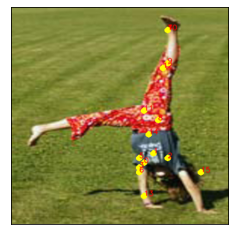

In [19]:
from matplotlib import pyplot as plt

img2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other

plt.imshow(img2)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()
